In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from scipy.stats import chisquare

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/dspitzfaden/Galvanize/capstone/data/new_reviews_inspection_period.csv')
df= df[df['inspection_grade']!='X']
df['A'] = np.where(df['inspection_grade']== 'A', 1, 0) #1 is A, 0 is B or C
df['B'] = np.where(df['inspection_grade']== 'B', 1, 0)
df['C'] = np.where(df['inspection_grade']== 'C', 1, 0)

grade_df= df[['yelp_business_id', 'inspection_date', 'last_inspection','inspection_grade']].reset_index().sort_values(['yelp_business_id', 'inspection_date', 'last_inspection']).reset_index()
grade_df= grade_df.drop_duplicates(['yelp_business_id', 'inspection_date', 'last_inspection'])
grade_df['A'] = np.where(grade_df['inspection_grade']== 'A', 1, 0) #1 is A, 0 is B or C


grouped_text= df.groupby(['yelp_business_id', 'inspection_date', 'last_inspection'])['yelp_review_text'].apply(lambda x: "{%s}" % '~~ '.join(x)).reset_index().sort_values(['yelp_business_id', 'inspection_date', 'last_inspection'])

In [3]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english', ngram_range=(2,2))
tfidf = count_vectorizer.fit_transform(grouped_text['yelp_review_text'].values)
features= count_vectorizer.vocabulary_

In [4]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, grade_df['A'].values,\
                                                    test_size=0.2)

In [5]:
rf = RandomForestClassifier(class_weight="balanced", max_depth=6).fit(X_train, y_train)
rf_pred= rf.predict(X_test)
rf_tn, rf_fp, rf_fn, rf_tp = confusion_matrix(rf_pred, y_test).ravel()
precision, recall = (rf_tp / (rf_tp+rf_fp)), (rf_tp/(rf_tp+rf_fn))
print('RF Precision: {}   RF Recall: {}'.format(precision, recall))

RF Precision: 0.7995933778681382   RF Recall: 0.8714783159227604


In [13]:
chi2_nlp = chi2(tfidf, grade_df['inspection_grade'].values)

In [14]:
chi_vocab_score = list(chi2_nlp[0])
p_val = list(chi2_nlp[1])

In [21]:
vocab_chi = zip(features, chi_vocab_score)
vocab_p_val = zip(features, p_val)

sorted_chi= sorted(vocab_chi, key=lambda x: x[1], reverse= True)
sorted_p_val = sorted(vocab_p_val, key=lambda x: x[1], reverse= False)

In [22]:
sorted_chi

[('sum places', 4258.9177895800403),
 ('overall really', 2595.462375091558),
 ('really like', 1813.4409915595827),
 ('2nd time', 1805.8487154007114),
 ('charge extra', 1706.8911920440328),
 ('extremely rude', 1535.6596992012892),
 ('gaming bar', 1470.0241199580587),
 ('location just', 1369.7916394202621),
 ('watch movies', 1146.8752958847299),
 ('sandwich really', 1126.2672476979203),
 ('ok better', 976.83156919770738),
 ('ins dives', 879.88855055041097),
 ('clean maintained', 805.13983153787046),
 ('eat healthy', 785.1376825009271),
 ('kind food', 690.62732298703622),
 ('good home', 688.30341611003598),
 ('10 years', 664.26921061798873),
 ('place feels', 663.27463836087986),
 ('recommended friend', 661.69136993969789),
 ('meat just', 660.16125106916104),
 ('centennial hills', 626.92615783859969),
 ('service delicious', 544.9468192004075),
 ('dipping sauce', 544.6823561407997),
 ('think ll', 539.76033919235022),
 ('came fast', 441.12736942993877),
 ('service isn', 438.59701049640768),


In [23]:
sorted_p_val

[('gaming bar', 0.0),
 ('really like', 0.0),
 ('extremely rude', 0.0),
 ('charge extra', 0.0),
 ('2nd time', 0.0),
 ('overall really', 0.0),
 ('sum places', 0.0),
 ('location just', 2.4534825714918599e-295),
 ('watch movies', 5.2292171681197665e-247),
 ('sandwich really', 1.5330508977690088e-242),
 ('ok better', 3.7445345867491041e-210),
 ('ins dives', 3.793260002011265e-189),
 ('clean maintained', 5.915967581397713e-173),
 ('eat healthy', 1.2721525297965586e-168),
 ('kind food', 3.7295111650134821e-148),
 ('good home', 1.1880159763741988e-147),
 ('10 years', 1.8984248663046468e-142),
 ('place feels', 3.1168310282221041e-142),
 ('recommended friend', 6.8624758785173319e-142),
 ('meat just', 1.4714296879357451e-141),
 ('centennial hills', 2.3029483999970157e-134),
 ('service delicious', 1.2682849840276508e-116),
 ('dipping sauce', 1.4468857214600245e-116),
 ('think ll', 1.679998066662099e-115),
 ('came fast', 3.5967263706515147e-94),
 ('service isn', 1.2673040754504959e-93),
 ('inside h

In [30]:
a_df = df[df['A']==1]
a_df['yelp_review_stars'].mean()

3.5533238702092933

In [31]:
b_df = df[df['B']==1]
b_df['yelp_review_stars'].mean()

3.5955624628000793

In [33]:
c_df = df[df['C']==1]
c_df['yelp_review_stars'].mean()

3.6746693794506613

In [128]:
bins = [x+.5 for x in range(6)]
ha = np.histogram(a_df['yelp_review_stars'], bins=bins)
hc = np.histogram(c_df['yelp_review_stars'], bins=bins)
chisquare(ha[0], hc[0])

Power_divergenceResult(statistic=2317766.8473072816, pvalue=0.0)

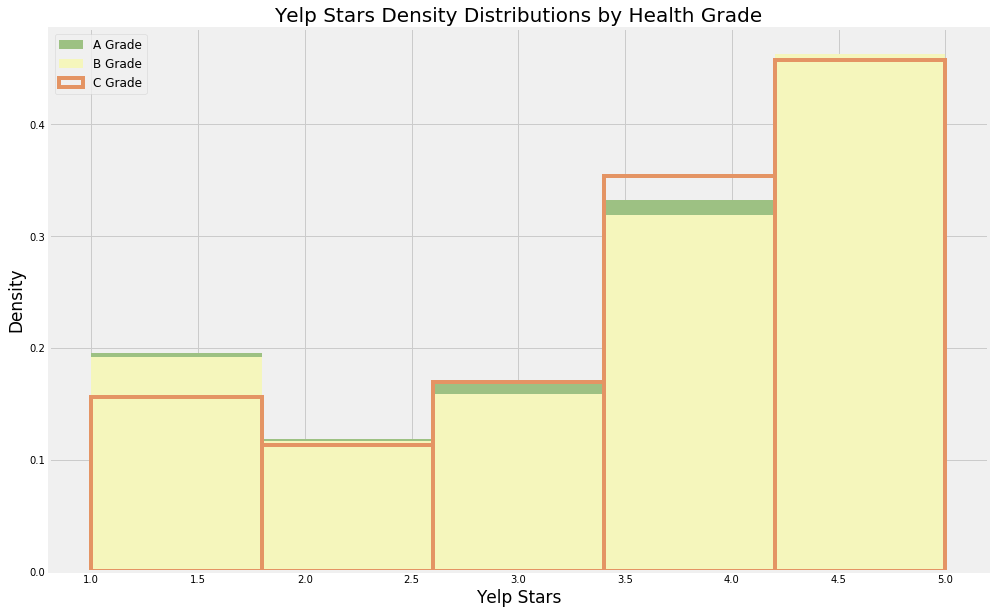

In [133]:
plt.figure(figsize=(15,10))
acounts, abins, abars= plt.hist(a_df['yelp_review_stars'], bins=5, normed=True, label= 'A Grade', color='#9DC183')
bcounts, bbins, bbars= plt.hist(b_df['yelp_review_stars'], bins=5, normed=True, label= 'B Grade', color='#F5F6BC')
ccounts, cbins, cbars= plt.hist(c_df['yelp_review_stars'], bins=5, normed=True, label='C Grade',facecolor='None', linewidth=4,edgecolor='#e49464')
plt.title('Yelp Stars Density Distributions by Health Grade', fontsize=20)
plt.xlabel('Yelp Stars', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.legend(fontsize='large')

In [ ]:
ac_chisq, ac_p = chisquare(ccounts, acounts)

In [83]:
ac_chisq

140868.4188937709

In [93]:
bc_chisq, bc_p = chisquare(ccounts, bcounts)

In [94]:
ba_chisq, ba_p = chisquare(acounts, bcounts)

In [95]:
print('A vs C Chi2: {}'.format(ac_chisq))
print('A vs B Chi2: {}'.format(ba_chisq))
print('B vs C Chi2: {}'.format(bc_chisq))

A vs C Chi2: 140868.4188937709
A vs B Chi2: 0.0031720896848445243
B vs C Chi2: 0.011507250202394053


In [96]:
print('A vs C Chi2: {}'.format(ac_p))
print('A vs B Chi2: {}'.format(ba_p))
print('B vs C Chi2: {}'.format(bc_p))

A vs C Chi2: 0.0
A vs B Chi2: 0.9999987435600071
B vs C Chi2: 0.9999835112520435
